<a href="https://colab.research.google.com/github/TariqAlhathloul/Smart-Street/blob/main/demo_isolating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install  ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 8.5 MB/s eta 0:00:00


## import libraries

In [13]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
from ultralytics import YOLO

## upload demo image and the model

In [5]:
image_path = '/content/frame_30.jpg'
video_path = '/content/cross-4.MP4'

In [6]:
model = YOLO("/content/best (3).pt", task='segment')

FileNotFoundError: [Errno 2] No such file or directory: '/content/best (3).pt'

In [7]:
model.device

NameError: name 'model' is not defined

In [8]:
model.benchmark

NameError: name 'model' is not defined

In [ ]:
model.metrics

## read and display the image

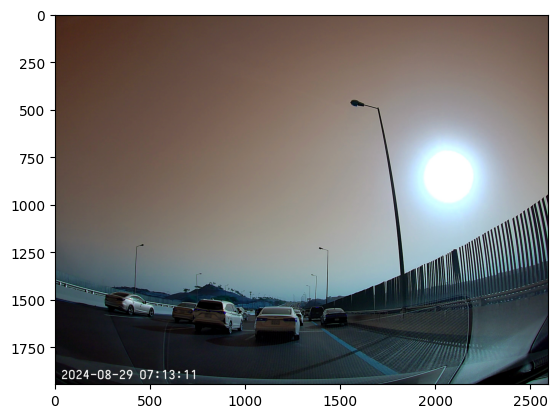

In [ ]:
image = cv2.imread(image_path)
#image = image[:, :, ::-1]
plt.imshow(image)

## send the image to the model

In [ ]:
results = model(image)


0: 480x640 1 solid-yellow-line, 308.0ms
Speed: 15.4ms preprocess, 308.0ms inference, 7.5ms postprocess per image at shape (1, 3, 480, 640)


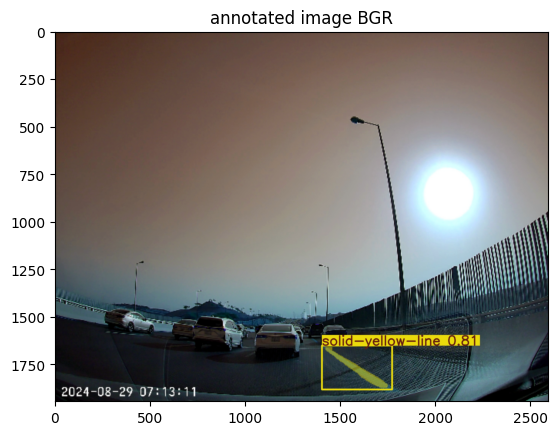

In [ ]:
result_image = cv2.imread('/content/result.jpg')
plt.title("annotated image BGR")
plt.imshow(result_image)

## convert BGR to RGB

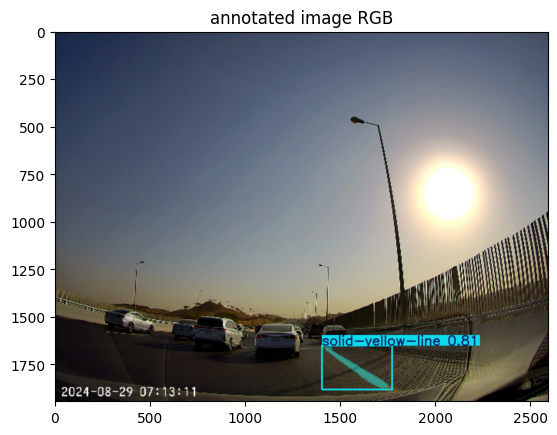

In [ ]:
result_image = cv2.imread('/content/result.jpg')
result_image = result_image[:, :, ::-1]
plt.title("annotated image RGB")
plt.imshow(result_image)

## save the resulting image

In [ ]:
# save the results
results[0].save('result.jpg')

'result.jpg'

In [ ]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.8061])
data: tensor([[1.4034e+03, 1.6527e+03, 1.7724e+03, 1.8837e+03, 8.0606e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (1944, 2592)
shape: torch.Size([1, 6])
xywh: tensor([[1587.8811, 1768.1946,  368.9486,  231.0236]])
xywhn: tensor([[0.6126, 0.9096, 0.1423, 0.1188]])
xyxy: tensor([[1403.4067, 1652.6827, 1772.3553, 1883.7063]])
xyxyn: tensor([[0.5414, 0.8501, 0.6838, 0.9690]])

In [ ]:
annotated_image = results[0]

In [ ]:
type(annotated_image)

ultralytics.engine.results.Results

In [ ]:
results[0].keypoints # is None

In [ ]:
results[0].boxes.xyxy

tensor([[1403.4067, 1652.6827, 1772.3553, 1883.7063]])

In [ ]:
results[0].boxes.conf

tensor([0.8061])

## remove the bounding box and keep the segmentation

In [ ]:
#mask = results[0].masks.data.numpy()
original_image = results[0].orig_img
b_mask = np.zeros(original_image.shape[:2], np.uint8) #binary mask

#original_image = original_image[:, :, ::-1]

In [ ]:
# counter results
counter = results[0].masks.xy.pop()
counter = counter.astype(np.int32) # change dtype
counter = counter.reshape(-1, 1, 2)

In [ ]:
# drow the segmentiona
image_masked = cv2.drawContours(b_mask, [counter], -1, (255, 255, 255), cv2.FILLED)

In [ ]:
type(image_masked)

numpy.ndarray

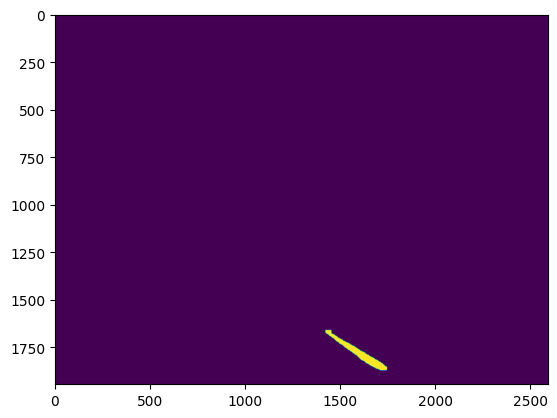

In [ ]:
plt.imshow(image_masked)

In [ ]:
image_masked_rgb = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)

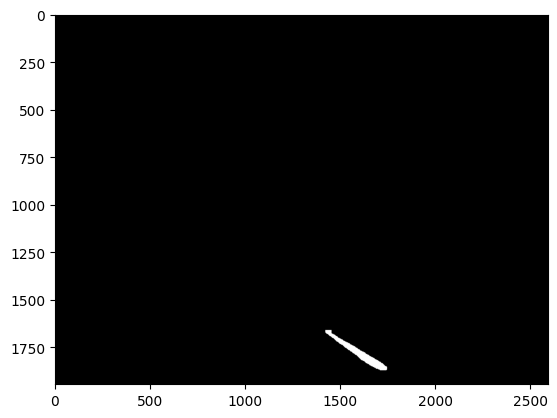

In [ ]:
plt.imshow(image_masked_rgb)

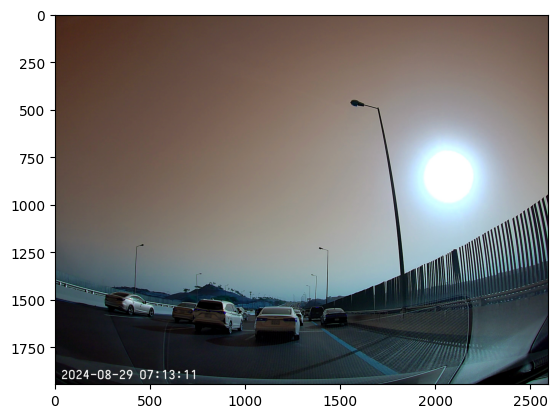

In [ ]:
plt.imshow(original_image)

In [16]:
def extract_frames(input_video_path:str ,output_images_path:str  , frame_rate_per_second: int):
    """
    input_video_path: path to the video file
    output_images_path: path where extracted frames will be saved
    frame_rate_per_second: the rate at which to extract the frames

    example: if you set the frame_rate_per_second to 1, in a 15 seconds video it will extract 15 frames
    if it's set to 2 it will extract 30 images.
    """
    assert frame_rate_per_second > 0, "frame rate must be greater than 0"
    assert input_video_path.endswith('.mp4'), "input video must be in mp4 format"
    assert os.path.exists(input_video_path), "input video path does not exist"

    if not os.path.exists(output_images_path):
        os.makedirs(output_images_path, exist_ok=True)

    frame_count = 0
    counter = 0

    cap = cv2.VideoCapture(input_video_path)
    assert cap.isOpened(), "Error opening video file"

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("Reached the end of the video")
            break
        frame_count += 1
        if frame_count % int(cap.get(5) / frame_rate_per_second) == 0:
            counter +=1
            cv2.imwrite(f"{output_images_path}/frame_{frame_count}.jpg", frame)

    cap.release()
    cv2.destroyAllWindows()
    print(f"Extracted {counter} frames successfully to the path: {output_images_path}")

In [18]:
extract_frames('/content/cross-4.MP4', '/content/images', 1)

Extracted 0 frames successfully to the path: /content/images
